In [1]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknow system... sorry~')
    
plt.rcParams['axes.unicode_minus'] = False

In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.

In [8]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [4]:
data

,Unnamed: 0,open,high,low,close,volume,value
0,2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
1,2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2,2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
3,2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
4,2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...,...
1341,2021-05-28 09:00:00,46568000.0,47069000.0,43009000.0,43723000.0,14678.133632,6.537899e+11
1342,2021-05-29 09:00:00,43723000.0,44812000.0,41405000.0,42688000.0,10628.404447,4.553351e+11
1343,2021-05-30 09:00:00,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11
1344,2021-05-31 09:00:00,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11


In [5]:
data['Unnamed: 0']

0       2017-09-25 09:00:00
1       2017-09-26 09:00:00
2       2017-09-27 09:00:00
3       2017-09-28 09:00:00
4       2017-09-29 09:00:00
               ...         
1341    2021-05-28 09:00:00
1342    2021-05-29 09:00:00
1343    2021-05-30 09:00:00
1344    2021-05-31 09:00:00
1345    2021-06-01 09:00:00
Name: Unnamed: 0, Length: 1346, dtype: object

In [6]:
data.rename({'Unnamed: 0':'date'}, axis = 1, inplace = True)

In [7]:
data['date'].str.split(' ')[0][0]

'2017-09-25'

In [8]:
list = []
for i in range(0,len(data)):
    date = data['date'].str.split(' ')[i][0]
    list.append(date)    

In [9]:
data['date'] = list

In [10]:
data

,date,open,high,low,close,volume,value
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...,...
1341,2021-05-28,46568000.0,47069000.0,43009000.0,43723000.0,14678.133632,6.537899e+11
1342,2021-05-29,43723000.0,44812000.0,41405000.0,42688000.0,10628.404447,4.553351e+11
1343,2021-05-30,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11
1344,2021-05-31,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11


In [11]:
data.set_index('date', inplace = True)

In [12]:
btc61 = data.loc['2017-09-25':'2018-03-25']
btc62 = data.loc['2017-09-25':'2018-09-25']
btc63 = data.loc['2017-09-25':'2019-03-25']
btc64 = data.loc['2017-09-25':'2019-09-25']
btc65 = data.loc['2017-09-25':'2020-03-25']
btc66 = data.loc['2017-09-25':'2020-09-25']
btc67 = data.loc['2017-09-25':'2021-03-25']
btc68 = data.loc['2017-09-25':'2021-06-01']

In [13]:
btc = data

C:\Users\A\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


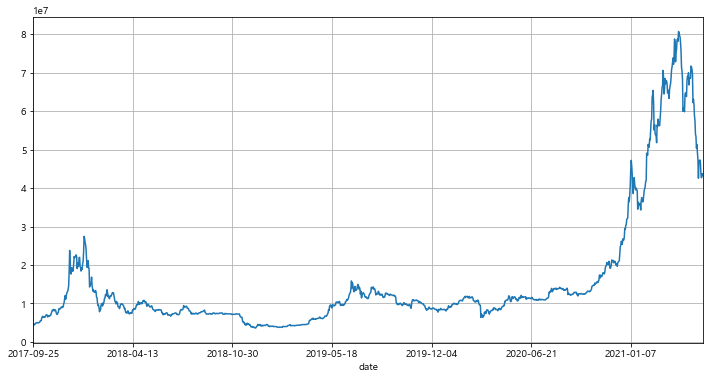

In [14]:
btc['close'].plot(figsize=(12,6), grid=True);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


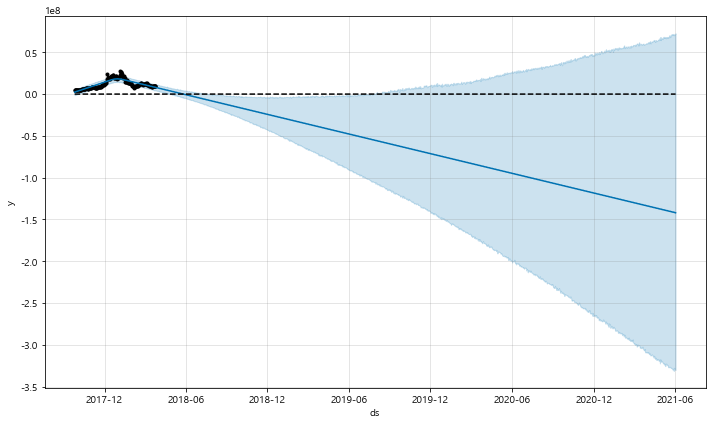

In [15]:
#['2017-09-25':'2018-03-25'] 로 2021-06-02까지 예측

btc611 = pd.DataFrame({'ds':btc61.index, 'y':btc61['close']})
btc611.reset_index(inplace=True)
btc611['cap'] = 15
btc611['floor'] = 0
del btc611['date']

m = Prophet(daily_seasonality=True)
m.fit(btc611);

future611 = m.make_future_dataframe(periods=1165) #며칠 뒤까지 예측할 것 인가
future611['cap'] = 100 #상한값
future611['floor'] = 0 #하한값
future611.tail()

forecast611 = m.predict(future611)
m.plot(forecast611);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


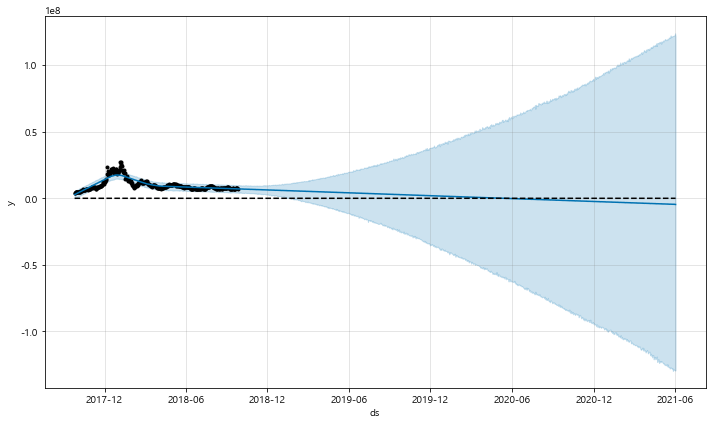

In [16]:
#['2017-09-25':'2018-09-25']로 예측


btc621 = pd.DataFrame({'ds':btc62.index, 'y':btc62['close']})
btc621.reset_index(inplace=True)
btc621['cap'] = 15
btc621['floor'] = 0
del btc621['date']

m = Prophet(daily_seasonality=True)
m.fit(btc621);

future621 = m.make_future_dataframe(periods=981) #며칠 뒤까지 예측할 것 인가
future621['cap'] = 100 #상한값
future621['floor'] = 0 #하한값
future621.tail()

forecast621 = m.predict(future621)
m.plot(forecast621);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


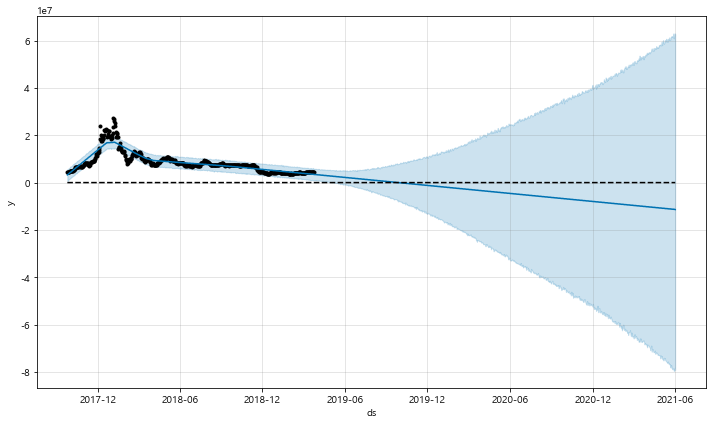

In [17]:
#['2017-09-25':'2019-03-25']로 예측


btc631 = pd.DataFrame({'ds':btc63.index, 'y':btc63['close']})
btc631.reset_index(inplace=True)
btc631['cap'] = 15
btc631['floor'] = 0
del btc631['date']

m = Prophet(daily_seasonality=True)
m.fit(btc631);

future631 = m.make_future_dataframe(periods=800) #며칠 뒤까지 예측할 것 인가
future631['cap'] = 100 #상한값
future631['floor'] = 0 #하한값
future631.tail()

forecast631 = m.predict(future631)
m.plot(forecast631);

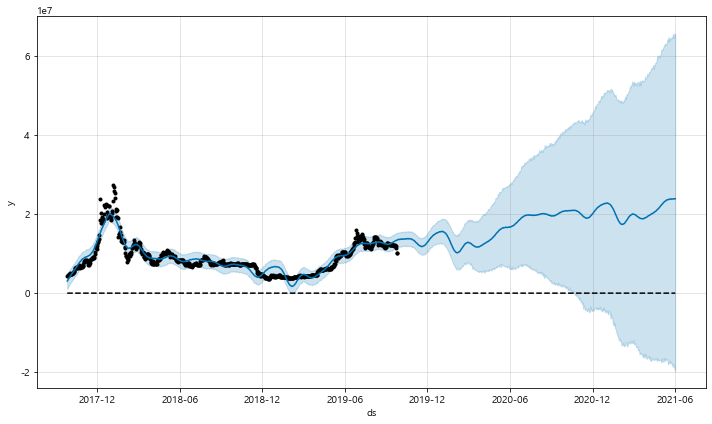

In [18]:
#['2017-09-25':'2019-09-25']로 예측


btc641 = pd.DataFrame({'ds':btc64.index, 'y':btc64['close']})
btc641.reset_index(inplace=True)
btc641['cap'] = 15
btc641['floor'] = 0
del btc641['date']

m = Prophet(daily_seasonality=True)
m.fit(btc641);

future641 = m.make_future_dataframe(periods=616) #며칠 뒤까지 예측할 것 인가
future641['cap'] = 100 #상한값
future641['floor'] = 0 #하한값
future641.tail()

forecast641 = m.predict(future641)
m.plot(forecast641);

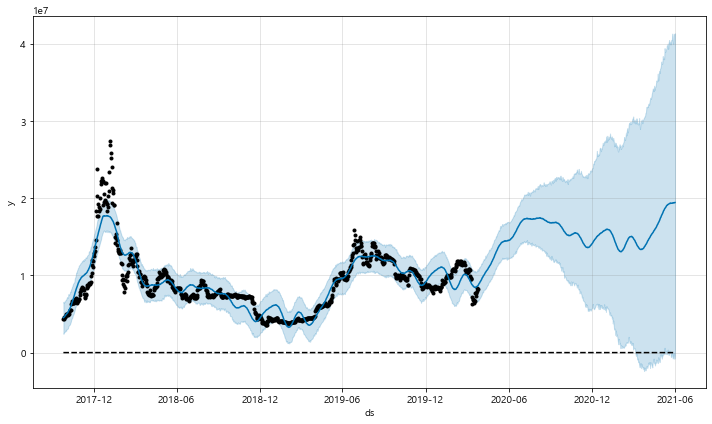

In [19]:
#['2017-09-25':'2020-03-25']로 예측

btc651 = pd.DataFrame({'ds':btc65.index, 'y':btc65['close']})
btc651.reset_index(inplace=True)
btc651['cap'] = 15
btc651['floor'] = 0
del btc651['date']

m = Prophet(daily_seasonality=True)
m.fit(btc651);

future651 = m.make_future_dataframe(periods=434) #며칠 뒤까지 예측할 것 인가
future651['cap'] = 100 #상한값
future651['floor'] = 0 #하한값
future651.tail()

forecast651 = m.predict(future651)
m.plot(forecast651);

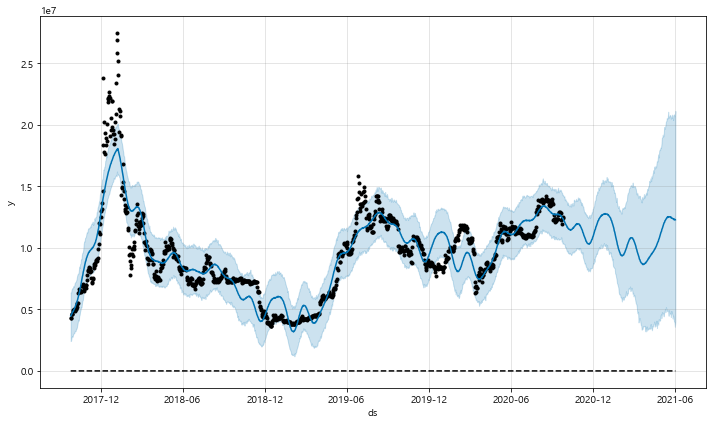

In [20]:
#['2017-09-25':'2020-09-25']로 예측

btc661 = pd.DataFrame({'ds':btc66.index, 'y':btc66['close']})
btc661.reset_index(inplace=True)
btc661['cap'] = 15
btc661['floor'] = 0
del btc661['date']

m = Prophet(daily_seasonality=True)
m.fit(btc661);

future661 = m.make_future_dataframe(periods=250) #며칠 뒤까지 예측할 것 인가
future661['cap'] = 100 #상한값
future661['floor'] = 0 #하한값
future661.tail()

forecast661 = m.predict(future661)
m.plot(forecast661);

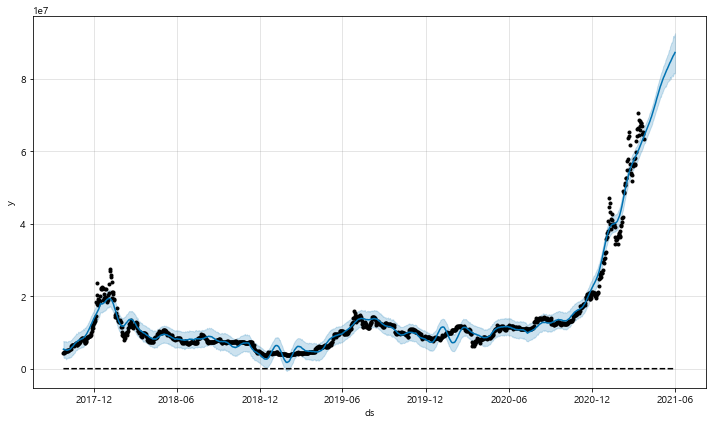

In [21]:
#['2017-09-25':'2021-03-25']로 예측

btc671 = pd.DataFrame({'ds':btc67.index, 'y':btc67['close']})
btc671.reset_index(inplace=True)
btc671['cap'] = 15
btc671['floor'] = 0
del btc671['date']

m = Prophet(daily_seasonality=True)
m.fit(btc671);

future671 = m.make_future_dataframe(periods=69) #며칠 뒤까지 예측할 것 인가
future671['cap'] = 100 #상한값
future671['floor'] = 0 #하한값
future671.tail()

forecast671 = m.predict(future671)
m.plot(forecast671);

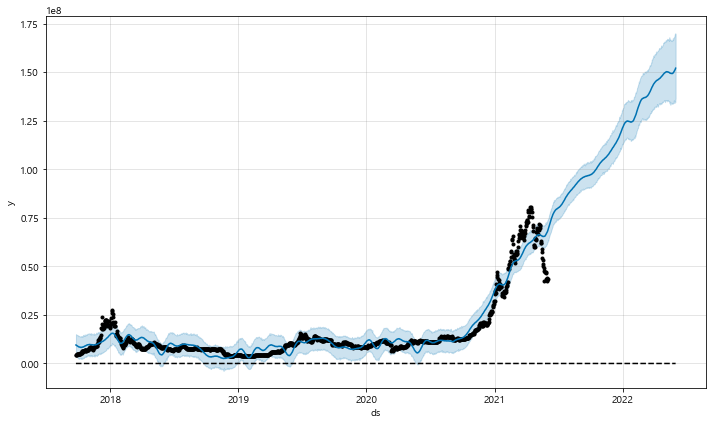

In [22]:
#['2017-09-25':'2021-06-01'] 로 예측


btc681 = pd.DataFrame({'ds':btc68.index, 'y':btc68['close']})
btc681.reset_index(inplace=True)
btc681['cap'] = 15
btc681['floor'] = 0
del btc681['date']

m = Prophet(daily_seasonality=True)
m.fit(btc681);

future681 = m.make_future_dataframe(periods=365) #며칠 뒤까지 예측할 것 인가
future681['cap'] = 100 #상한값
future681['floor'] = 0 #하한값
future681.tail()

forecast681 = m.predict(future681)
m.plot(forecast681);

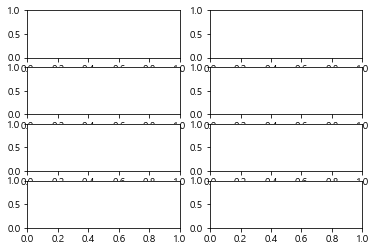

In [23]:
fig = plt.figure() #그래프가 위치할 기본 틀
axes1 = fig.add_subplot(4,2,1) #행의 크기, 열의 크기
axes2 = fig.add_subplot(4,2,2)
axes3 = fig.add_subplot(4,2,3)
axes4 = fig.add_subplot(4,2,4)
axes5 = fig.add_subplot(4,2,5) #행의 크기, 열의 크기
axes6 = fig.add_subplot(4,2,6)
axes7 = fig.add_subplot(4,2,7)
axes8 = fig.add_subplot(4,2,8)

In [ ]:
#제목 추가
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")
fig

In [ ]:
#기본 틀(fig) 제목 추가
fig.suptitle("Anscombe Data")
fig

In [ ]:
#그래프 숫자, 이름이 겹쳐 보일때 tight_layout()
fig.tight_layout() 
fig